In [1]:
#librerias
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from  sklearn import metrics
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
#método para leer el diccionario de datos
def leerDiccionarioDatos():
    diccionarioDatos = datasets.load_iris()
    return diccionarioDatos

In [3]:
leerDiccionarioDatos() #imprimir los datos del diccionario de datos

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
leerDiccionarioDatos().keys() #extraer las columnas del dataset

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
leerDiccionarioDatos().feature_names  # nombres de x

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
print("Labels: \n" , leerDiccionarioDatos().target_names)

Labels: 
 ['setosa' 'versicolor' 'virginica']


In [7]:
print("Shape: \n" , leerDiccionarioDatos().data.shape)

Shape: 
 (150, 4)


In [8]:
print("target: \n" , leerDiccionarioDatos().target)

target: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [9]:
X = leerDiccionarioDatos().data
y = leerDiccionarioDatos().target

In [10]:
''' creamos la funcion para entrenar el modelo tomando el 70 porciento de datos del data set y el 30 para las pruebas del azar'''
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=109)

In [11]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(105, 4) (45, 4) (105,) (45,)


In [12]:
#crear el modelo kernel el lineal
clf = svm.SVC(kernel='linear')

In [13]:
 #entrenar el modelo
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [14]:
#prediccion 
y_pred = clf.predict(X_test)

In [15]:
#impresiones
print(y_pred)

[2 1 2 0 2 1 0 2 1 2 2 0 1 0 0 0 1 2 0 1 2 0 2 0 0 2 2 1 1 2 1 2 1 2 2 1 0
 2 2 1 1 1 1 2 0]


In [16]:
'''evaluar el modelo  mediante las metricas'''
#evaluar el algoritmo .. con metricas
#modelo Accuracy
print("Accury:", metrics.accuracy_score(y_test, y_pred))

Accury: 0.9555555555555556


In [17]:
print("Precision:", metrics.precision_score(y_test, y_pred, average='macro'))

Precision: 0.9629629629629629


In [18]:
print("Recall:", metrics.recall_score(y_test, y_pred, average='macro'))

Recall: 0.9607843137254902


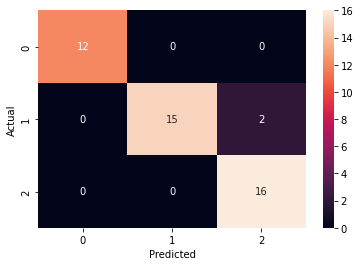

In [20]:

'''actuales del dataset y los predichos del modelo'''
data = {'y_Actual':    y_test,
        'y_Predicted': y_pred
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True)
plt.show()